In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from framework_pkg.framework import FrameWork

plt.rcParams['text.usetex']=True
plt.style.use('classic')

param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 0., 
        'mu3'  : 0.  ,
        'mdm'  : 5e-2 , 
        'alpha': 0.  ,
        'eps' : 0.  ,
        'alpha_eps' : 0.  ,
        'M12'  : 6.9e-5 }


frame_predicted_total_signal  = FrameWork(threshold=4.5,
                                        efficiency_correction=True,
                                        resolution_correction=False,
                                    )

data = np.loadtxt('./Data/modulation_data.txt')
annual_data = np.array(pd.read_csv('./Data/plot-data.csv'))

# frame_predicted_total_signal.time_weights = np.loadtxt('./Data/time_exposures_2.txt')

# msw_signal_fraction_2 = frame_predicted_total_signal.__getitem__(param) 


Warning!: Python module pyslha not found, disabling slha reading routines


In [8]:
def ExposureTime(lam):
    t_year = np.linspace(0,1,365)
    sin_deltas = - np.sin(0.4091) * np.cos(2 * np.pi * t_year)
    cos_deltas = np.sqrt(1 - sin_deltas**2)
    t_day = np.arange(0,0.5,0.001)

    cos_lam = np.cos(np.radians(lam))
    sin_lam = np.sin(np.radians(lam))

    #labels= [r'$\rm Jan$', r'$\rm Jun$', r'$\rm s$']
    exposure_list = [[]for i in range (4)]

    for i in range(len(sin_deltas)):
        cos_eta = cos_lam * cos_deltas[i] * np.cos(2 * np.pi * t_day) - sin_lam * sin_deltas[i]

        exposure_list[0].append(i)
        

        if len(t_day[cos_eta>=0]) == len(t_day):
            exposure_list[2].append(0)
            exposure_list[3].append(24)
        elif  0 < len(t_day[cos_eta>=0]) < len(t_day)  : 
            exposure_list[2].append(24 - t_day[cos_eta>=0][-1]*24*2)
            exposure_list[3].append(t_day[cos_eta>=0][-1]*24*2)
        else:
            exposure_list[2].append(24)
            exposure_list[3].append(0)


        exposure_list[1].append(t_year[i] * 365)
    return np.array(exposure_list).T


frame_predicted_total_signal.time_day = ExposureTime(6)
frame_predicted_total_signal.time_ev = frame_predicted_total_signal.time_day[:,1] * 2.4 * 6. * 6. * 1.519 
frame_predicted_total_signal.theta_p = (2 * np.pi / 365.25) * frame_predicted_total_signal.time_day[:,1]
msw_signal_fraction = frame_predicted_total_signal.__getitem__(param) 


frame_predicted_total_signal.time_day = ExposureTime(82)
frame_predicted_total_signal.time_ev = frame_predicted_total_signal.time_day[:,1] * 2.4 * 6. * 6. * 1.519 
frame_predicted_total_signal.theta_p = (2 * np.pi / 365.25) * frame_predicted_total_signal.time_day[:,1]
msw_signal_fraction_2 = frame_predicted_total_signal.__getitem__(param) 


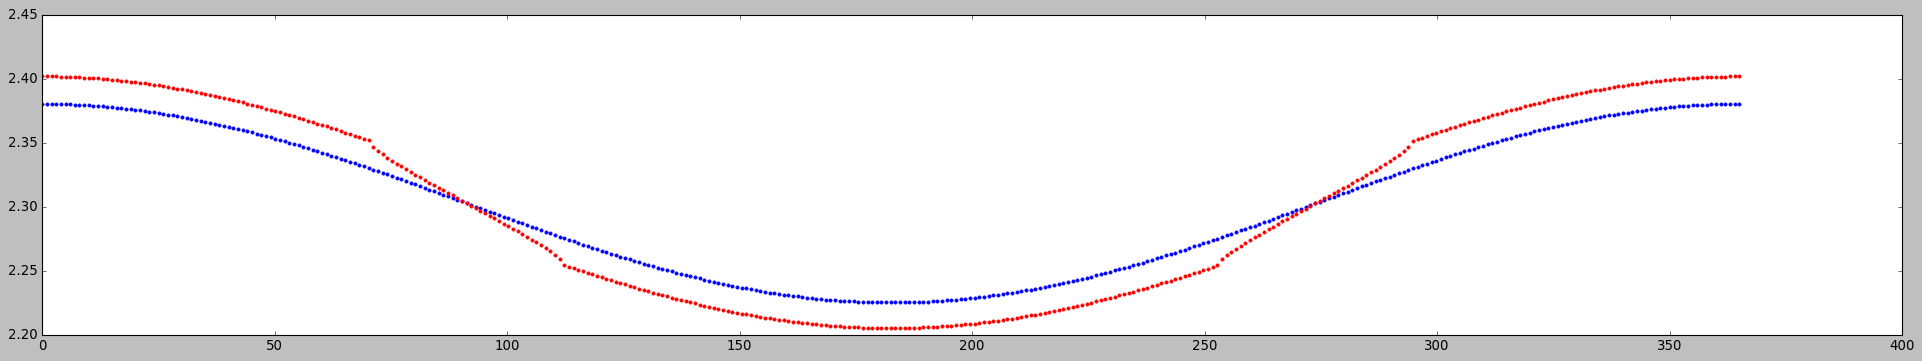

In [9]:
plt.figure(figsize=(30,5))
#plt.xlim(0,3600)
#plt.ylim(-0.5,0.5)

plt.plot(frame_predicted_total_signal.time_day[:,1], msw_signal_fraction, 'b.')
plt.plot(frame_predicted_total_signal.time_day[:,1], msw_signal_fraction_2, 'r.')
#plt.plot(frame_predicted_total_signal.time_weights[:,1], msw_signal_fraction_2, 'r.')

<ErrorbarContainer object of 3 artists>

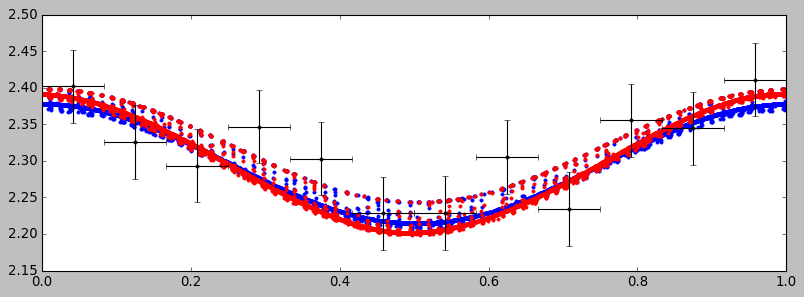

In [6]:
day_from_prehelion = frame_predicted_total_signal.time_weights[:,1] + 257

# time_bins = np.linspace(0,1,13)
# bin_prediction_msw = np.zeros((len(time_bins),2))
# bin_prediction_msw2 = np.zeros((len(time_bins),2))

# day_from_prehelion = frame_predicted_total_signal.time_weights[:,1] + 257

# for i in range (len(time_bins)-1):
#     cond = (((day_from_prehelion % 365.25)/365.25) >= time_bins[i]) & (((day_from_prehelion % 365.25)/365.25) < time_bins[i+1])
#     T_k = np.sum(frame_predicted_total_signal.time_weights[cond,2:],axis=1)
#     bin_prediction_msw[i,1] = (1/np.sum(T_k)) * np.sum(T_k * msw_signal_fraction[cond])
#     bin_prediction_msw[i,0] = annual_data[i,0]
#     bin_prediction_msw2[i,1] = (1/np.sum(T_k)) * np.sum(T_k * msw_signal_fraction_2[cond])
#     bin_prediction_msw2[i,0] = annual_data[i,0]

plt.figure(figsize=(12,4))
plt.xlim(0,1)
plt.plot(((day_from_prehelion % 365.25)/365.25), msw_signal_fraction , 'b.')
plt.plot(((day_from_prehelion % 365.25)/365.25), msw_signal_fraction_2 , 'r.')


plt.errorbar(annual_data[:,0], annual_data[:,1], 0.05 * np.ones(12), 0.5*(annual_data[1,0] - annual_data[0,0])*np.ones(12) , fmt='k.')

In [3]:
param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 0.02, 
        'mu3'  : 0.  ,
        'mdm'  : 0.2 , 
        'alpha': 0.  ,
        'eps' : 0.5  ,
        'alpha_eps' : 0. ,
        'M12'  : 6.9e-5 }
ULDM_signal_fraction = frame_predicted_total_signal.__getitem__(param) 

In [ ]:
param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 0.07, 
        'mu3'  : 0.  ,
        'mdm'  : 900*2e-6 , 
        'alpha': 2.  ,
        'eps' : 0.5  ,
        'alpha_eps' : 0. ,
        'M12'  : 6.9e-5 }
ULDM_signal_fraction = frame_predicted_total_signal.__getitem__(param) 

In [105]:
time_bins = np.unique(frame_predicted_total_signal.time_weights[:,0])
bin_prediction_msw = np.zeros((len(time_bins),2))
bin_prediction_uldm = np.zeros((len(time_bins),2))

for i in range(len(time_bins)):
    cond = frame_predicted_total_signal.time_weights[:,0] == time_bins[i]
    T_k = np.sum(frame_predicted_total_signal.time_weights[cond,2:],axis=1)
    bin_prediction_msw[i,1] = (1/np.sum(T_k)) * np.sum(T_k * msw_signal_fraction[cond])
    bin_prediction_msw[i,0] = data[i,0]
    bin_prediction_uldm[i,1] = (1/np.sum(T_k)) * np.sum(T_k * ULDM_signal_fraction[cond])
    bin_prediction_uldm[i,0] = data[i,0]

<ErrorbarContainer object of 3 artists>

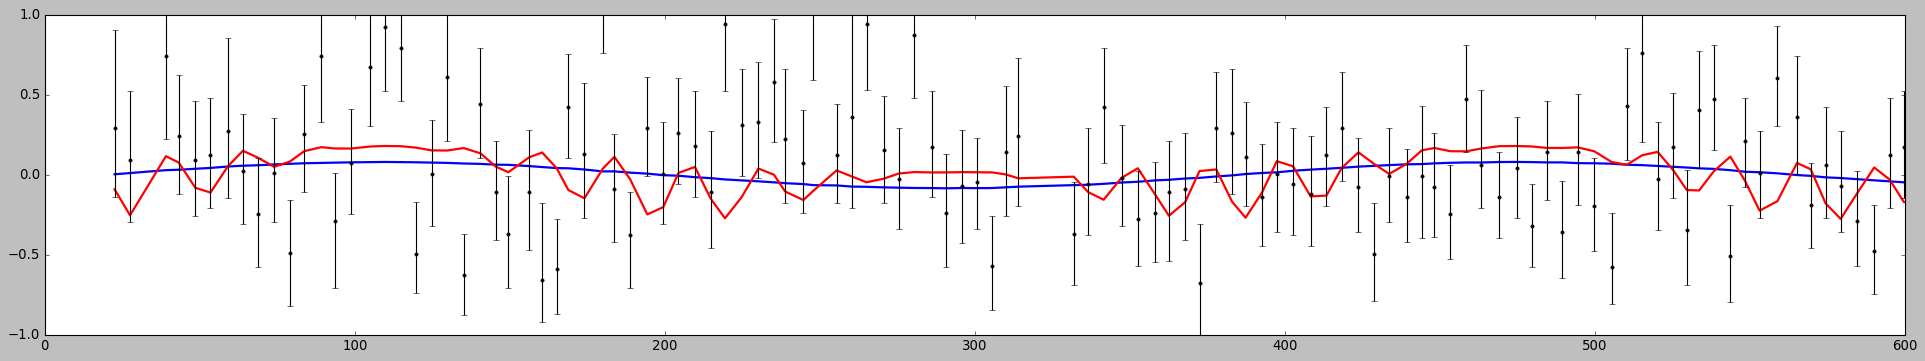

In [106]:
plt.figure(figsize=(30,5))
plt.xlim(0,600)
plt.ylim(-1,1)

#plt.plot(frame_predicted_total_signal.time_weights[:,1], msw_signal_fraction, 'b.')
#plt.plot(frame_predicted_total_signal.time_weights[:,1], ULDM_signal_fraction, 'r.')


plt.plot(bin_prediction_msw[:,0], bin_prediction_msw[:,1] - np.mean(bin_prediction_msw[:,1]),lw=2,ls='-',color='b')
plt.plot(bin_prediction_uldm[:,0], bin_prediction_uldm[:,1] - np.mean(bin_prediction_uldm[:,1]), lw=2,ls='-',color='r')


plt.errorbar(data[:,0], data[:,1] - np.mean(data[:,1]), np.array((data[:,3],data[:,2])), fmt='k.')

In [84]:
day_from_prehelion = frame_predicted_total_signal.time_weights[:,1] + 257

time_bins = np.linspace(0,1,13)
bin_prediction_msw = np.zeros((len(time_bins),2))
bin_prediction_uldm = np.zeros((len(time_bins),2))

day_from_prehelion = frame_predicted_total_signal.time_weights[:,1] + 257

for i in range (len(time_bins)-1):
    cond = (((day_from_prehelion % 365.25)/365.25) >= time_bins[i]) & (((day_from_prehelion % 365.25)/365.25) < time_bins[i+1])
    T_k = np.sum(frame_predicted_total_signal.time_weights[cond,2:],axis=1)
    bin_prediction_msw[i,1] = (1/np.sum(T_k)) * np.sum(T_k * msw_signal_fraction[cond])
    bin_prediction_msw[i,0] = annual_data[i,0]
    bin_prediction_uldm[i,1] = (1/np.sum(T_k)) * np.sum(T_k * ULDM_signal_fraction[cond])
    bin_prediction_uldm[i,0] = annual_data[i,0]
    

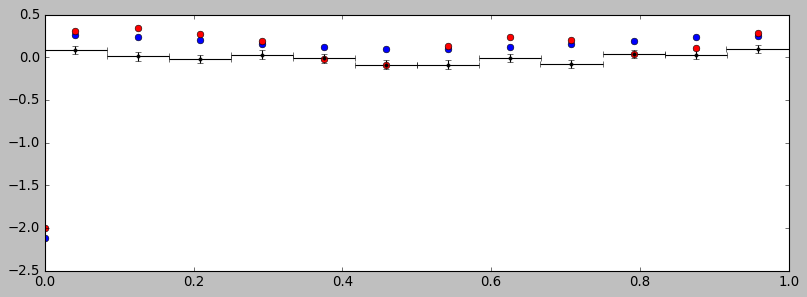

In [87]:
plt.figure(figsize=(12,4))
plt.xlim(0,1)

plt.errorbar(annual_data[:,0], annual_data[:,1] - np.mean(annual_data[:,1]), 0.05 * np.ones(12), 0.5*(annual_data[1,0] - annual_data[0,0])*np.ones(12) , fmt='k.')



#plt.plot(((day_from_prehelion % 365.25)/365.25), msw_signal_fraction , 'b.')
#plt.plot(((day_from_prehelion % 365.25)/365.25), ULDM_signal_fraction , 'r.')

# plt.plot(bin_prediction_msw[:,0], bin_prediction_msw[:,1] ,'o')
# plt.plot(bin_prediction_uldm[:,0], bin_prediction_uldm[:,1],'o')


plt.plot(bin_prediction_msw[:,0], bin_prediction_msw[:,1] - np.mean(bin_prediction_msw[:,1]),'o',color='b')
plt.plot(bin_prediction_uldm[:,0], bin_prediction_uldm[:,1] - np.mean(bin_prediction_uldm[:,1]), 'o',color='r')